In [9]:
import matplotlib.pyplot as plt


enter png file name, make sure to upload it on this colab environment

Vase_binary



 Below is the distance transformed image


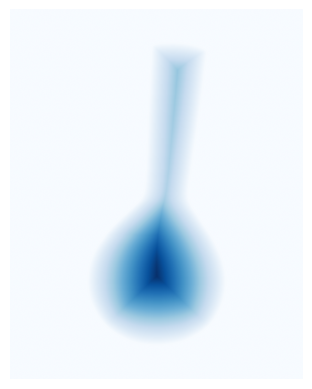

In [10]:
from PIL import Image
a=input("enter png file name, make sure to upload it on this colab environment\n\n")
# Load image
img = Image.open(a+".png")

# Convert to numpy array (for full pixel matrix)
import numpy as np
pixels = np.array(img.convert("L"))  # make grayscale

  # print top-left 10x10 pixel values
h, w = pixels.shape
INF = h + w  # safe large number

ans = np.where(pixels == 0, 0, h+w).astype(np.int32)
for k in range(pixels.shape[0]):
  for i in range(pixels.shape[1]):
    if pixels[k][i]==255:
      if i==0  or k==0 :
        ans[k][i]=1
      else:
        ans[k][i]=min(ans[k][i-1],ans[k-1][i])+1




for k in range(1,pixels.shape[0]+1):
  for i in range(1,pixels.shape[1]+1):
    if pixels[-k][-i]==255:
      if i==1  or k==1 :
        ans[-k][-i]=1
      else:
        poss=min(ans[-k][-i+1],ans[-k+1][-i])+1
        ans[-k][-i]=min(poss,ans[-k][-i])

print("\n\n\n Below is the distance transformed image")
plt.imshow(ans, cmap='Blues')
plt.axis('off')
plt.savefig(a+"DT"+".png", bbox_inches='tight', pad_inches=0)
plt.show()



Here is the computed skeleton using MAT


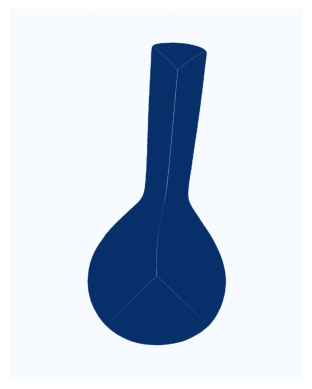

In [11]:
ans_pad = np.pad(ans, pad_width=1, mode='constant', constant_values=-999999999)
b = np.ones_like(ans_pad)
for k in range(1,ans_pad.shape[0]-1):
  for i in range(1,ans_pad.shape[1]-1):
    if ans_pad[k][i]>=max([ans_pad[k][i-1],ans_pad[k][i+1],ans_pad[k+1][i],ans_pad[k-1][i]]):
      b[k][i]=0


final=b[1:-1, 1:-1]*pixels
print("\n\nHere is the computed skeleton using MAT")
plt.imshow(final, cmap='Blues')
plt.axis('off')
plt.show()
plt.axis('off')  # optional: remove axes
plt.imshow(final, cmap='Blues', interpolation='nearest')  # 'gray' colormap

plt.savefig(a+"MAT"+".png", bbox_inches='tight', pad_inches=0)
plt.close()



